In [10]:
import numpy as np
import tensorflow as tf

from os import listdir
from os.path import isfile, join
import cv2
import matplotlib.pyplot as plt

In [11]:
tf.test.is_gpu_available()

False

In [2]:
'''
resize image for faster training
and less memory usage

'''

def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    resized = cv2.resize(image, dim, interpolation = inter)
    return resized

In [3]:
'''
read images from each directories.
convert RGB images to Greyscale
reshape to numpy array [num_samples, height, width , 1]
create respective labels in one_hot enocded format [num_samples, num_classes]

'''
def get_data(dist_path, samples):
    #initialize empty numpy array
    x = np.empty((samples, img_resize, img_resize, 1),\
                 dtype=np.float32)
    y = np.empty( ((samples, num_classes)))
    index = 0
    #loop through each directory
    for j, cls in enumerate(classes):
        filenames = listdir(join(dist_path,cls))
        for filename in filenames:
            #convert to Greyscale
            #resize to (256, 256, 1)
            x[index,:,:] = (image_resize(cv2.imread(join\
                    (dist_path, cls, filename),0),\
                    width =img_resize)/255 )\
                    .reshape(img_height, img_width, 1)
            temp = np.zeros((num_classes), dtype=np.int32)
            temp[j] = 1
            y[index,:] = temp
            index+=1
    return x, y


'''
find mean and variance for 
normalizing dataset
'''
def mean(X, n):
    return X.sum()/n

def variance(X, n):
    return np.square(X).sum() / n

'''
get image shape
'''
def get_image_prop(path):
    category = listdir(path)[0]
    filename = listdir(join(path, category))[0]
    return image_resize(cv2.imread(join(path, category,filename)),width = img_resize).shape

In [4]:
train_path = 'train'
test_path = 'test'
img_resize = 256 # reshape size
classes = sorted(listdir(train_path)) #class names
num_classes = len(classes) # number of output classes
img_height, img_width, _ = get_image_prop(test_path) #height and width of image
train_samples = sum([len(listdir(join(train_path, cls))) for cls in classes]) #number of training examples
test_samples = sum([len(listdir(join(test_path, cls))) for cls in classes])  #number of test examples

In [4]:
# Create cnn some wrappers
def conv2d(x, W, b, strides=1):
    #convolution layer with bias
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    #max pooling for downsampling
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')

# Create model
def conv_net(x, weights, biases, dropout):
    
    #convolution layer followed by max pool
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    print(conv1)
    conv1 = maxpool2d(conv1, k=2)
    print(conv1)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    print(conv2)
    conv2 = maxpool2d(conv2, k=2)
    print(conv2)
    
    # Convolution Layer
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    print(conv3)
    conv3 = maxpool2d(conv3, k=2)
    print(conv3)
    
    #flatted to fully connected layer
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    print(fc1)
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    print(fc1)
    fc1 = tf.nn.relu(fc1)
    print(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)
    print(fc1)

    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    print(out)
    return out

In [6]:
X_train, Y_train = get_data(train_path, train_samples)
X_test, Y_test= get_data(test_path, test_samples)
# shuffle dataset
# np.random.seed(0)
# np.random.shuffle(X_train)
# np.random.shuffle(Y_train)

In [7]:
# Normalize inputs
# X_mean = (X_train.sum((1,2)) / mat).reshape(-1, 1, 1, 1)
# X_variance = (np.square(X_train).sum((1,2)) / mat).reshape(-1, 1, 1, 1)
# X_train = (X_train - X_mean) / X_variance

In [5]:
num_examples = X_train.shape[0]
num_steps = 150
dropout = 0.75
display_step = 1
batch = 220
learning_rate = 0.001

NameError: name 'X_train' is not defined

In [6]:
# create placeholders for X and Y
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, img_height, img_width, 1])
Y = tf.placeholder(tf.float32, [None, num_classes])

keep_prob = tf.placeholder(tf.float32)

NameError: name 'img_height' is not defined

In [21]:
'''
initialize random filter
'''
weights = {
    # 5x5 conv, 1 input, 4 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 4])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 4, 8])),
    'wc3': tf.Variable(tf.random_normal([5, 5, 8, 16])),
    'wd1': tf.Variable(tf.random_normal([16384 , 512])),
    'out': tf.Variable(tf.random_normal([512, num_classes]))
}

In [7]:
'''
initialize random bias values
'''
biases = {
    'bc1': tf.Variable(tf.random_normal([4])),
    'bc2': tf.Variable(tf.random_normal([8])),
    'bc3': tf.Variable(tf.random_normal([16])),
    'bd1': tf.Variable(tf.random_normal([512])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

NameError: name 'num_classes' is not defined

In [8]:
logits = conv_net(X, weights, biases, keep_prob)
#apply softmax to logits for predition
prediction = tf.nn.softmax(logits)

#calculate croos entropy loss
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
#initialize adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

NameError: name 'X' is not defined

In [9]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

epoch 10 on batch 1, train acc= 0.74, loss 23099.28, test acc= 0.63
----------------------------------------------------------------------
epoch 10 on batch 2, train acc= 0.68, loss 37982.52, test acc= 0.67
----------------------------------------------------------------------
epoch 20 on batch 1, train acc= 0.86, loss 9503.56, test acc= 0.93
----------------------------------------------------------------------
epoch 20 on batch 2, train acc= 0.85, loss 13315.06, test acc= 0.93
----------------------------------------------------------------------
epoch 30 on batch 1, train acc= 0.95, loss 3346.42, test acc= 1.00
----------------------------------------------------------------------
epoch 30 on batch 2, train acc= 0.91, loss 4538.15, test acc= 1.00
----------------------------------------------------------------------
epoch 40 on batch 1, train acc= 0.97, loss 1540.98, test acc= 1.00
----------------------------------------------------------------------
epoch 40 on batch 2, train acc=

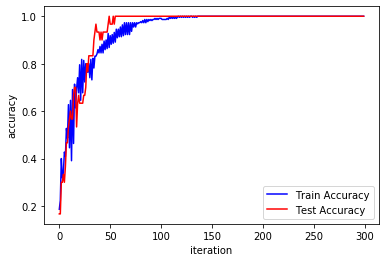

In [14]:
# Start training
train_acc_list = list()
test_acc_list = list()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        for i in range(0, num_examples, batch):
            sess.run([optimizer], feed_dict={X: X_train[i:i+batch,:,:,:],
                                    Y: Y_train[i:i+batch,:],
                                    keep_prob: dropout})
            if step % display_step == 0 or step == 1:
                acc, loss= sess.run([accuracy, loss_op],
                            feed_dict={X: X_train[i:i+batch,:,:,:],
                            Y: Y_train[i:i+batch,:],
                            keep_prob: 1.0})
                test_acc = sess.run([accuracy], feed_dict={X: X_test, Y: Y_test, keep_prob: 1.0})
                
                train_acc_list.append(acc)
                test_acc_list.append(test_acc)
                
                if step % 10 == 0:
                    print("epoch "+str(step)+" on batch "+str((i+batch)//batch)+\
                          ", train acc= " + "{:.2f}, loss {:.2f}, test acc= {:.2f}".format(acc, loss, test_acc[0]))
                    print("-"*70)
        if step % 40 == 0:
            #save model every40 steps
            saver.save(sess,"models/pre_trained_cnn.ckpt", global_step=step)

#plot train vs test accuracy
plt.plot(np.arange(0, 300, 1),train_acc_list, '-b',label="Train Accuracy")
plt.plot(np.arange(0, 300, 1),test_acc_list, '-r',label="Test Accuracy")
plt.xlabel("iteration")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.show()

In [15]:
# with tf.Session() as sess:
#     saver = tf.train.Saver()
#     saver.restore(sess, "models/pre_trained_cnn.ckpt-120")
#     predic_train = sess.run(prediction , feed_dict={X: X_train, keep_prob: 1})
#     predic_test = sess.run(prediction , feed_dict={X: X_test, keep_prob: 1})

In [16]:
# sum(predic_train.argmax(1) == Y_train.argmax(1)) / 440

In [17]:
# sum(predic_test.argmax(1) == Y_test.argmax(1)) / 30